# Quick intro to Feature Engineering

Feature engineering is the concept of developing new features from existing data or to intiutively select relevant features for modelling.

There are many methods to create new features and one of them is **Polynomial Features.**

## Polynomial Features
* Generate new feature matrix with degree less than equal to specificied matrix degree (individual feautres).

We make new features that are powers of current features and also multiples of the features.

Why?

While two variables independently might not show a correlation between themselves & TARGET, the interaction of these variables might be of interest.

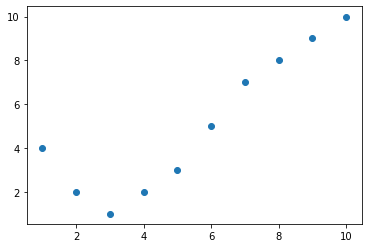

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([4, 2, 1, 2, 3, 5, 7, 8, 9, 10])
plt.scatter(x, y)

Lets fit a linear regression model, i.e. a line predicting modelling the behaviour of y with x.

In [16]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Text(0.5, 1.0, 'Linear Model')

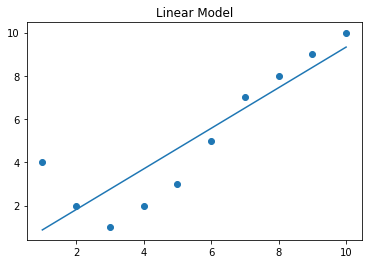

In [17]:
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)
plt.title('Linear Model')

We require a polynomial regression for x, y. Lets try first with degree = 2 (default in Polynomial Features).

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.]])

The matrix has first column of x, and second column of X<sup>2</sup>, lets compute the linear regression on this.

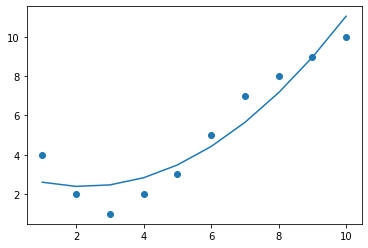

In [19]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

I think we can still do one better, lets try with degree = 3.


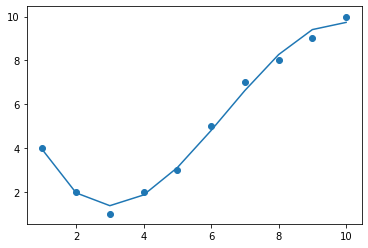

In [20]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X3 = poly.fit_transform(x.reshape(-1,1))
model = LinearRegression().fit(X3, y)
yfit = model.predict(X3)
plt.scatter(x, y)
plt.plot(x, yfit)

### Conclusion
As we can see using polynomial features to transform the data without changing the model is a powerful tool.